<a href="https://colab.research.google.com/github/longgggg1310/Hand-Gesture-Recognition-to-control-car-/blob/main/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os


Image Size:  (340, 340)


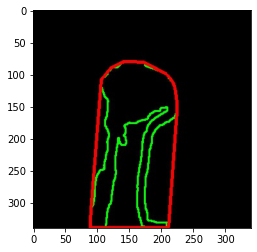

In [2]:
pic = Image.open('/content/drive/MyDrive/dataset1/train/0/saved_img1002.jpg')
pic_arr = np.asarray(pic)
print("Image Size: ",pic_arr.shape[0:2])
plt.imshow(pic_arr)


In [3]:

train_dir = os.path.join('/content/drive/MyDrive/dataset1/', 'train')
validation_dir = os.path.join('/content/drive/MyDrive/dataset1/', 'val')

In [4]:
train_hand_dir = os.path.join(train_dir, '0')  
train_hand1_dir = os.path.join(train_dir, '1')  
validation_hand_dir = os.path.join(validation_dir, '0')  
validation_hand1_dir = os.path.join(validation_dir, '1') 

In [5]:
num_hand_tr = len(os.listdir(train_hand_dir))
num_hand1_tr = len(os.listdir(train_hand1_dir))

num_hand_val = len(os.listdir(validation_hand_dir))
num_hand1_val = len(os.listdir(validation_hand1_dir))

total_train = num_hand_tr + num_hand1_tr
total_val = num_hand_val + num_hand1_val

In [6]:

print("Total training images:", total_train)
print("Total validation images:", total_val)
EPOCHS = 100


Total training images: 260
Total validation images: 67


In [7]:
nbatch = 2
i_size = 100

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset1/train',
                                                 target_size=(i_size,i_size),
                                                 batch_size =nbatch,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset1/val',
                                            target_size=(i_size,i_size),
                                            batch_size =nbatch,
                                            class_mode = 'binary')


Found 260 images belonging to 2 classes.
Found 67 images belonging to 2 classes.


Text(0.5, 0, 'Class')

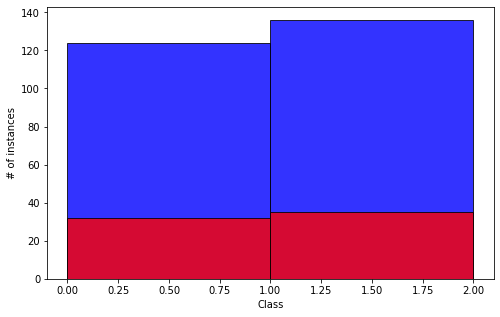

In [8]:
plt.figure(figsize=(8,5))
h1 = plt.hist(training_set.classes, bins=range(0,3), alpha=0.8, color='blue', edgecolor='black')
h2 = plt.hist(test_set.classes,  bins=range(0,3), alpha=0.8, color='red', edgecolor='black')
plt.ylabel('# of instances')
plt.xlabel('Class')

In [9]:
model = keras.models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3),activation=tf.nn.relu,input_shape=(i_size,i_size,3)),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3, 3),activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(128, kernel_size=(3, 3),activation=tf.nn.relu),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(512,activation=tf.nn.relu),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation=tf.nn.sigmoid)
])


In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [11]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.binary_crossentropy,
    metrics=['accuracy'])


In [12]:
callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
]

In [13]:

history = model.fit_generator(
        training_set,
        steps_per_epoch=int(np.ceil(total_train / float(nbatch))),
        epochs=30,
        validation_data=test_set,
        validation_steps=int(np.ceil(total_val / float(nbatch))),
        callbacks = callbacks_list
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


130/130 [==============================] - 34s 251ms/step - loss: 0.6927 - accuracy: 0.5269 - val_loss: 0.5232 - val_accuracy: 0.7612
Epoch 2/30
130/130 [==============================] - 21s 163ms/step - loss: 0.6521 - accuracy: 0.6154 - val_loss: 0.4789 - val_accuracy: 0.8507
Epoch 3/30
130/130 [==============================] - 21s 163ms/step - loss: 0.5553 - accuracy: 0.7462 - val_loss: 0.4118 - val_accuracy: 0.8657
Epoch 4/30
130/130 [==============================] - 22s 169ms/step - loss: 0.4952 - accuracy: 0.7346 - val_loss: 0.2949 - val_accuracy: 0.8955
Epoch 5/30
130/130 [==============================] - 23s 175ms/step - loss: 0.4829 - accuracy: 0.7615 - val_loss: 0.2909 - val_accuracy: 0.8806
Epoch 6/30
130/130 [==============================] - 22s 170ms/step - loss: 0.4441 - accuracy: 0.7846 - val_loss: 0.2809 - val_accuracy: 0.9104
Epoch 7/30
130/130 [==============================] - 22s 169ms/step - loss: 0.3551 - accuracy: 0.8462 - val_loss: 0.1500 - val_accuracy: 0.9

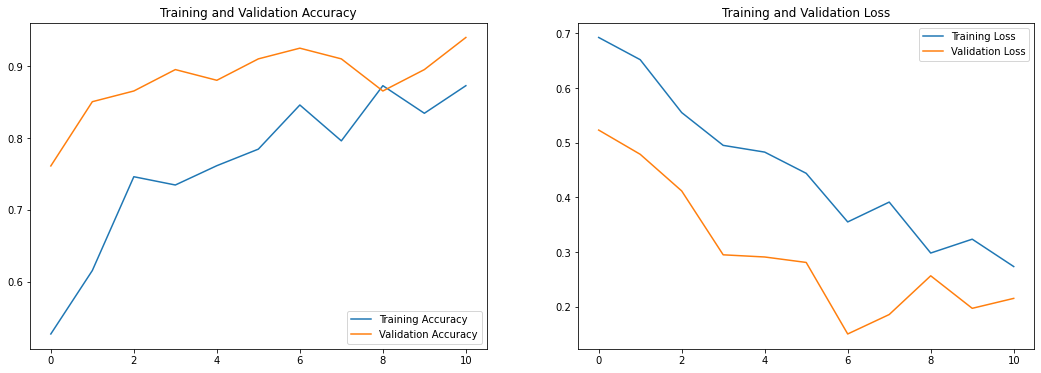

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=len(loss)
epochs_range = range(epochs)

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()